In [60]:
import numpy as np
import pandas as pd


In [133]:
demo= pd.read_csv("C:\\Users\\KIIT\\Desktop\\FeynnLabs\\TASK2\\deldemo.csv").fillna(0)

In [140]:
delocal = pd.read_csv("C:\\Users\\KIIT\\Desktop\\FeynnLabs\\TASK2\\delocal.csv").fillna(0)

In [141]:
delocal.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,0,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,0,1200,2.0,1.0,51.00,Aundh Road


In [138]:
demo.head()

,AGE_DESC,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key,MARITAL_STATUS_CODE
0,65+,35-49,Homeowner,2 Adults No Kids,2,None/Unknown,1,A
1,45-54,50-74,Homeowner,2 Adults No Kids,2,None/Unknown,7,A
2,25-34,25-34,Unknown,2 Adults Kids,3,1,8,U
3,25-34,75-99,Homeowner,2 Adults Kids,4,2,13,U
4,45-54,50-74,Homeowner,Single Female,1,None/Unknown,16,B


In [81]:
demo.columns

Index(['AGE_DESC', 'INCOME_DESC', 'HOMEOWNER_DESC', 'HH_COMP_DESC',
       'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC', 'household_key',
       'MARITAL_STATUS_CODE'],
      dtype='object')

In [82]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE_DESC             801 non-null    object
 1   INCOME_DESC          801 non-null    object
 2   HOMEOWNER_DESC       801 non-null    object
 3   HH_COMP_DESC         801 non-null    object
 4   HOUSEHOLD_SIZE_DESC  801 non-null    object
 5   KID_CATEGORY_DESC    801 non-null    object
 6   household_key        801 non-null    int64 
 7   MARITAL_STATUS_CODE  801 non-null    object
dtypes: int64(1), object(7)
memory usage: 50.2+ KB


In [85]:
demo = demo.drop(['household_key', 'MARITAL_STATUS_CODE'], axis = 1)

In [86]:
demo.head(10)

,AGE_DESC,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
0,65+,35-49,Homeowner,2 Adults No Kids,2,None/Unknown
1,45-54,50-74,Homeowner,2 Adults No Kids,2,None/Unknown
2,25-34,25-34,Unknown,2 Adults Kids,3,1
3,25-34,75-99,Homeowner,2 Adults Kids,4,2
4,45-54,50-74,Homeowner,Single Female,1,None/Unknown
5,65+,0-15,Homeowner,2 Adults No Kids,2,None/Unknown
6,45-54,100-124,Homeowner,2 Adults No Kids,2,None/Unknown
7,35-44,15-24,Unknown,Single Female,1,None/Unknown
8,25-34,75-99,Renter,2 Adults No Kids,2,None/Unknown
9,45-54,75-99,Homeowner,2 Adults No Kids,2,None/Unknown


In [87]:
demo = demo[demo['HOMEOWNER_DESC']!='Unknown']

In [88]:
un1 = list(demo.HOMEOWNER_DESC.unique())
fur = pd.DataFrame(un1, columns=['furnishing'])
fur

,furnishing
0,Homeowner
1,Renter
2,Probable Renter
3,Probable Owner


In [89]:
demo.loc[demo['HOMEOWNER_DESC'] == 'Probable Renter', 'HOMEOWNER_DESC'] = 'Renter'
demo.loc[demo['HOMEOWNER_DESC'] == 'Probable Owner', 'HOMEOWNER_DESC'] = 'Homeowner'

In [90]:
un1 = list(demo.HOMEOWNER_DESC.unique())
fur = pd.DataFrame(un1, columns=['furnishing'])
fur

,furnishing
0,Homeowner
1,Renter


In [91]:
un1 = list(demo.INCOME_DESC.unique())
fur = pd.DataFrame(un1, columns=['fu'])
fur

,fu
0,35-49
1,50-74
2,75-99
3,0-15
4,100-124
5,25-34
6,125-149
7,15-24
8,150-174
9,250+


In [92]:
fd = demo[['INCOME_DESC']]
fd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568 entries, 0 to 799
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   INCOME_DESC  568 non-null    object
dtypes: object(1)
memory usage: 8.9+ KB


In [93]:
fd.head()

,INCOME_DESC
0,35-49
1,50-74
3,75-99
4,50-74
5,0-15


In [136]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    
fd['new_sal'] = fd.INCOME_DESC.apply(convert_sqft_to_num)
fd.head()

,INCOME_DESC,new_sal
0,35-49,42.0
1,50-74,62.0
3,75-99,87.0
4,50-74,62.0
5,0-15,7.5


In [97]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568 entries, 0 to 799
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INCOME_DESC  568 non-null    object 
 1   new_sal      558 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.3+ KB


In [98]:
un1 = list(fd.new_sal.unique())
fur2 = pd.DataFrame(un1, columns=['fu'])
fur2


,fu
0,42.0
1,62.0
2,87.0
3,7.5
4,112.0
5,29.5
6,137.0
7,19.5
8,162.0
9,NaN


In [99]:
demo2 = pd.merge(demo,fd,left_index=True, right_index=True)
demo2.head()

,AGE_DESC,INCOME_DESC_x,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,INCOME_DESC_y,new_sal
0,65+,35-49,Homeowner,2 Adults No Kids,2,None/Unknown,35-49,42.0
1,45-54,50-74,Homeowner,2 Adults No Kids,2,None/Unknown,50-74,62.0
3,25-34,75-99,Homeowner,2 Adults Kids,4,2,75-99,87.0
4,45-54,50-74,Homeowner,Single Female,1,None/Unknown,50-74,62.0
5,65+,0-15,Homeowner,2 Adults No Kids,2,None/Unknown,0-15,7.5


In [100]:
demo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568 entries, 0 to 799
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE_DESC             568 non-null    object 
 1   INCOME_DESC_x        568 non-null    object 
 2   HOMEOWNER_DESC       568 non-null    object 
 3   HH_COMP_DESC         568 non-null    object 
 4   HOUSEHOLD_SIZE_DESC  568 non-null    object 
 5   KID_CATEGORY_DESC    568 non-null    object 
 6   INCOME_DESC_y        568 non-null    object 
 7   new_sal              558 non-null    float64
dtypes: float64(1), object(7)
memory usage: 56.1+ KB


In [101]:
demo2.dropna()

,AGE_DESC,INCOME_DESC_x,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,INCOME_DESC_y,new_sal
0,65+,35-49,Homeowner,2 Adults No Kids,2,None/Unknown,35-49,42.0
1,45-54,50-74,Homeowner,2 Adults No Kids,2,None/Unknown,50-74,62.0
3,25-34,75-99,Homeowner,2 Adults Kids,4,2,75-99,87.0
4,45-54,50-74,Homeowner,Single Female,1,None/Unknown,50-74,62.0
5,65+,0-15,Homeowner,2 Adults No Kids,2,None/Unknown,0-15,7.5
...,...,...,...,...,...,...,...,...
794,45-54,35-49,Homeowner,Single Female,1,None/Unknown,35-49,42.0
795,35-44,50-74,Homeowner,2 Adults No Kids,2,None/Unknown,50-74,62.0
796,35-44,50-74,Homeowner,2 Adults No Kids,2,None/Unknown,50-74,62.0
797,45-54,75-99,Homeowner,Unknown,3,1,75-99,87.0


In [117]:
demo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516 entries, 0 to 799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE_DESC             516 non-null    object 
 1   INCOME_DESC_x        516 non-null    object 
 2   HOMEOWNER_DESC       516 non-null    object 
 3   HH_COMP_DESC         516 non-null    object 
 4   HOUSEHOLD_SIZE_DESC  516 non-null    object 
 5   KID_CATEGORY_DESC    516 non-null    object 
 6   INCOME_DESC_y        516 non-null    object 
 7   new_sal              516 non-null    float64
 8   age_cat              516 non-null    int32  
 9   own                  516 non-null    int32  
dtypes: float64(1), int32(2), object(7)
memory usage: 40.3+ KB


In [118]:
un1 = list(demo2.new_sal.unique())
fur = pd.DataFrame(un1, columns=['furnishing'])
fur

,furnishing
0,42.0
1,62.0
2,87.0
3,7.5
4,112.0
5,29.5
6,137.0
7,19.5
8,162.0
9,187.0


In [119]:
demo2 = demo2[demo2['HH_COMP_DESC']!='Unknown']

In [120]:
demo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516 entries, 0 to 799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE_DESC             516 non-null    object 
 1   INCOME_DESC_x        516 non-null    object 
 2   HOMEOWNER_DESC       516 non-null    object 
 3   HH_COMP_DESC         516 non-null    object 
 4   HOUSEHOLD_SIZE_DESC  516 non-null    object 
 5   KID_CATEGORY_DESC    516 non-null    object 
 6   INCOME_DESC_y        516 non-null    object 
 7   new_sal              516 non-null    float64
 8   age_cat              516 non-null    int32  
 9   own                  516 non-null    int32  
dtypes: float64(1), int32(2), object(7)
memory usage: 40.3+ KB


In [121]:
demo2.loc[demo2['KID_CATEGORY_DESC'] == 'None/Unknown', 'KID_CATEGORY_DESC'] = 0
demo2

,AGE_DESC,INCOME_DESC_x,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,INCOME_DESC_y,new_sal,age_cat,own
0,65+,35-49,Homeowner,2 Adults No Kids,2,0,35-49,42.0,5,0
1,45-54,50-74,Homeowner,2 Adults No Kids,2,0,50-74,62.0,3,0
3,25-34,75-99,Homeowner,2 Adults Kids,4,2,75-99,87.0,1,0
4,45-54,50-74,Homeowner,Single Female,1,0,50-74,62.0,3,0
5,65+,0-15,Homeowner,2 Adults No Kids,2,0,0-15,7.5,5,0
...,...,...,...,...,...,...,...,...,...,...
792,45-54,75-99,Homeowner,Single Male,1,0,75-99,87.0,3,0
794,45-54,35-49,Homeowner,Single Female,1,0,35-49,42.0,3,0
795,35-44,50-74,Homeowner,2 Adults No Kids,2,0,50-74,62.0,2,0
796,35-44,50-74,Homeowner,2 Adults No Kids,2,0,50-74,62.0,2,0


In [122]:
un1 = list(demo2.KID_CATEGORY_DESC.unique())
fur = pd.DataFrame(un1, columns=['furnishing'])
fur

,furnishing
0,0
1,2
2,3+
3,1


In [123]:
demo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516 entries, 0 to 799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE_DESC             516 non-null    object 
 1   INCOME_DESC_x        516 non-null    object 
 2   HOMEOWNER_DESC       516 non-null    object 
 3   HH_COMP_DESC         516 non-null    object 
 4   HOUSEHOLD_SIZE_DESC  516 non-null    object 
 5   KID_CATEGORY_DESC    516 non-null    object 
 6   INCOME_DESC_y        516 non-null    object 
 7   new_sal              516 non-null    float64
 8   age_cat              516 non-null    int32  
 9   own                  516 non-null    int32  
dtypes: float64(1), int32(2), object(7)
memory usage: 40.3+ KB


In [124]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
demo2['age_cat']=labelencoder.fit_transform(demo2['AGE_DESC'])
demo['own']=labelencoder.fit_transform(demo2['HOMEOWNER_DESC'])
demo2.head(10)


,AGE_DESC,INCOME_DESC_x,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,INCOME_DESC_y,new_sal,age_cat,own
0,65+,35-49,Homeowner,2 Adults No Kids,2,0,35-49,42.0,5,0
1,45-54,50-74,Homeowner,2 Adults No Kids,2,0,50-74,62.0,3,0
3,25-34,75-99,Homeowner,2 Adults Kids,4,2,75-99,87.0,1,0
4,45-54,50-74,Homeowner,Single Female,1,0,50-74,62.0,3,0
5,65+,0-15,Homeowner,2 Adults No Kids,2,0,0-15,7.5,5,0
6,45-54,100-124,Homeowner,2 Adults No Kids,2,0,100-124,112.0,3,0
8,25-34,75-99,Renter,2 Adults No Kids,2,0,75-99,87.0,1,1
9,45-54,75-99,Homeowner,2 Adults No Kids,2,0,75-99,87.0,3,0
11,45-54,25-34,Renter,Single Female,1,0,25-34,29.5,3,1
12,35-44,35-49,Homeowner,2 Adults No Kids,2,0,35-49,42.0,2,0


In [125]:
demo2 = demo2[demo2['new_sal']!= 'NaN']
demo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516 entries, 0 to 799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE_DESC             516 non-null    object 
 1   INCOME_DESC_x        516 non-null    object 
 2   HOMEOWNER_DESC       516 non-null    object 
 3   HH_COMP_DESC         516 non-null    object 
 4   HOUSEHOLD_SIZE_DESC  516 non-null    object 
 5   KID_CATEGORY_DESC    516 non-null    object 
 6   INCOME_DESC_y        516 non-null    object 
 7   new_sal              516 non-null    float64
 8   age_cat              516 non-null    int32  
 9   own                  516 non-null    int32  
dtypes: float64(1), int32(2), object(7)
memory usage: 40.3+ KB


In [126]:
demo2=demo2.dropna()

In [127]:
un1 = list(demo2.new_sal.unique())
fur = pd.DataFrame(un1, columns=['furnishing'])
fur

,furnishing
0,42.0
1,62.0
2,87.0
3,7.5
4,112.0
5,29.5
6,137.0
7,19.5
8,162.0
9,187.0


In [128]:
demo2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516 entries, 0 to 799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE_DESC             516 non-null    object 
 1   INCOME_DESC_x        516 non-null    object 
 2   HOMEOWNER_DESC       516 non-null    object 
 3   HH_COMP_DESC         516 non-null    object 
 4   HOUSEHOLD_SIZE_DESC  516 non-null    object 
 5   KID_CATEGORY_DESC    516 non-null    object 
 6   INCOME_DESC_y        516 non-null    object 
 7   new_sal              516 non-null    float64
 8   age_cat              516 non-null    int32  
 9   own                  516 non-null    int32  
dtypes: float64(1), int32(2), object(7)
memory usage: 40.3+ KB


In [134]:
yu = demo2[['age_cat','new_sal','own']]
yu

NameError: name 'demo2' is not defined

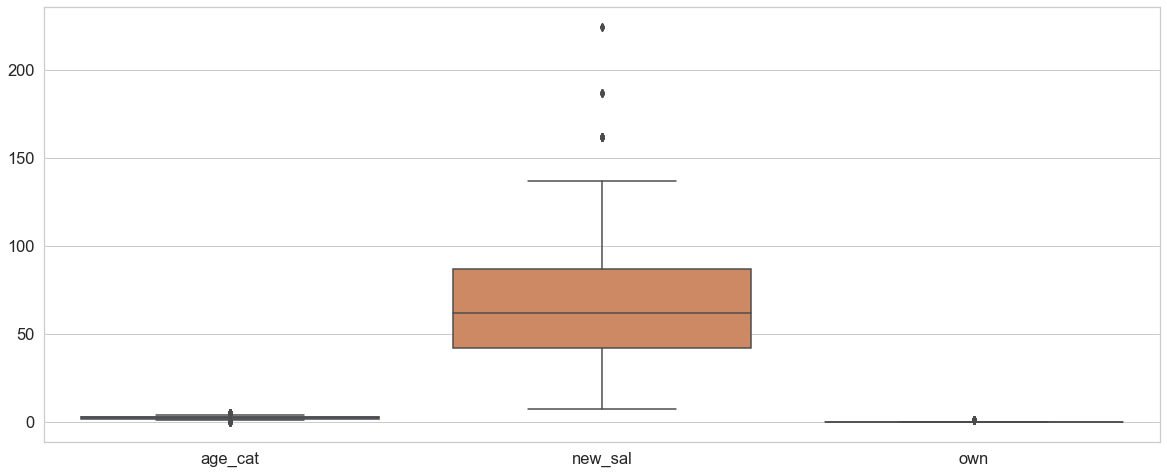

In [135]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(20,8)}, font_scale=1.5, style='whitegrid')


sns.boxplot(data=yu);

q1 = fin.quantile(0.25)
q3 = fin.quantile(0.75)
IQR = q3-q1
IQR

fin = fin[~((fin) > (q3 + (1.5 * IQR))).any(axis=1)]

fin.head()

In [36]:
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [37]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, random_state=0)
tsne_obj= tsne.fit_transform(yu)


In [38]:
df = pd.DataFrame({'x':tsne_obj[:,0],
                        'y':tsne_obj[:,1],
                        'z':tsne_obj[:,2]})
df.head()

,x,y,z
0,-29.696695,-40.272366,-65.939659
1,-73.499435,-35.622414,18.338640
2,26.209282,-31.030472,67.739410
3,-59.813015,-31.838444,26.018808
4,-7.117542,-66.311119,-34.052887


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       516 non-null    float32
 1   y       516 non-null    float32
 2   z       516 non-null    float32
dtypes: float32(3)
memory usage: 6.2 KB


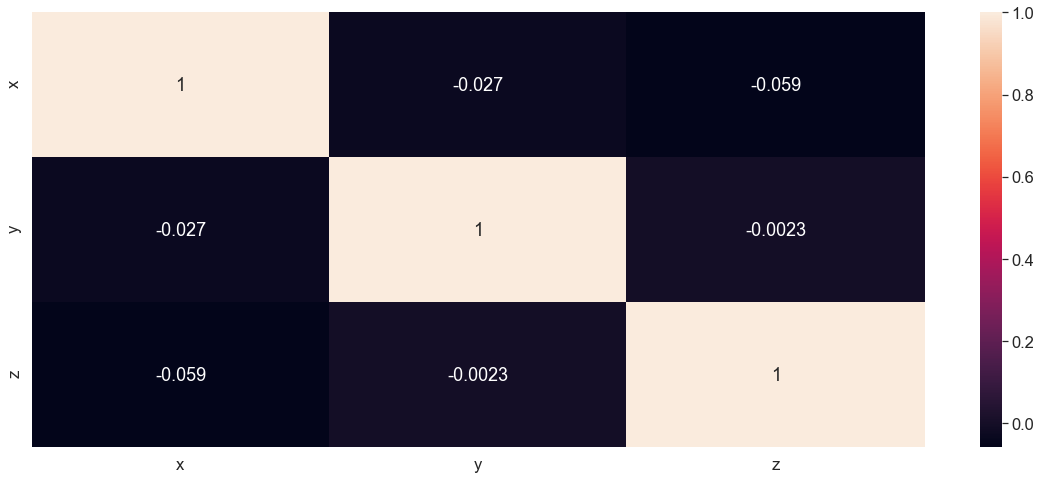

In [40]:
sns.heatmap(df.corr(), annot=True)

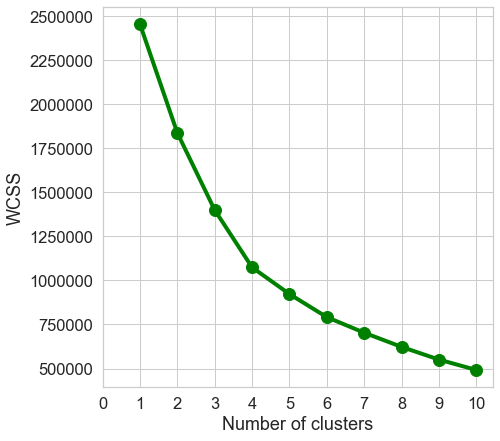

In [41]:
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(df)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [42]:
model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(tsne_obj)

C:\Python38\Anaconda3\envs\py3-TF2.0\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



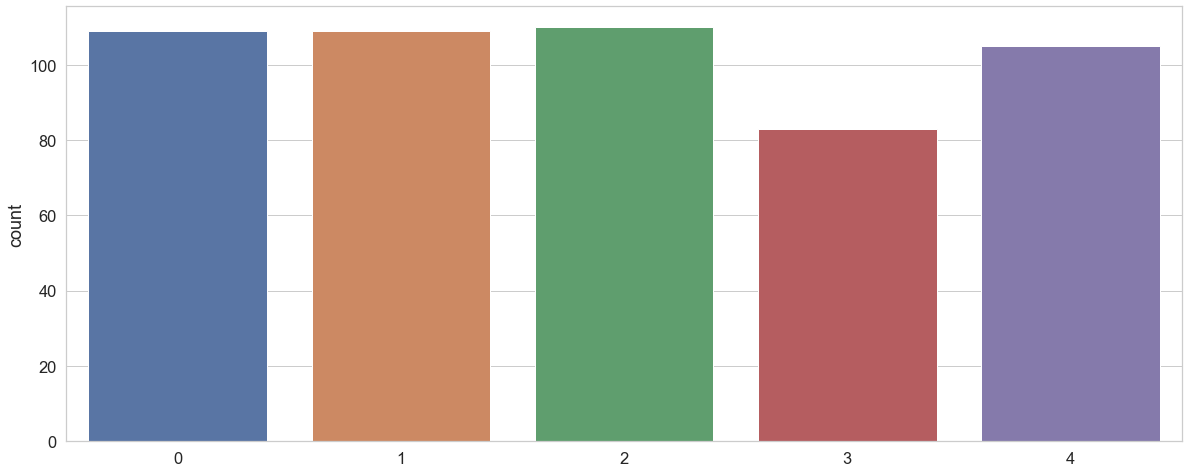

In [43]:
sns.countplot(y_clusters)

In [130]:
import plotly as py
import plotly.graph_objs as go

def calcKMean(i,X3):
  algorithm = (KMeans(n_clusters = i ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
  algorithm.fit(X3)
  labels3 = algorithm.labels_
  centroids3 = algorithm.cluster_centers_
  return labels3

def plot3d(data, titles, labels3):
  data['label3'] =  labels3
  trace1 = go.Scatter3d(
      x= data[titles[0]],
      y= data[titles[1]],
      z= data[titles[2]],
      mode='markers',
      marker=dict(
          color = data['label3'], 
          size= 5,
          line=dict(
              color= data['label3'],
              width= 12
          ),
          opacity=0.8
      )
  )
  data = [trace1]
  layout = go.Layout(
  #     margin=dict(
  #         l=0,
  #         r=0,
  #         b=0,
  #         t=0
  #     )
      title= 'Clusters',
      scene = dict(
              xaxis = dict(title  = titles[0]),
              yaxis = dict(title  = titles[1]),
              zaxis = dict(title  = titles[2])
          )
  )
  fig = go.Figure(data=data, layout=layout)
  py.offline.iplot(fig)

ModuleNotFoundError: No module named 'plotly'

In [45]:
df.head(20)

,x,y,z
0,-29.696695,-40.272366,-65.939659
1,-73.499435,-35.622414,18.338640
2,26.209282,-31.030472,67.739410
3,-59.813015,-31.838444,26.018808
4,-7.117542,-66.311119,-34.052887
5,65.472458,15.610728,31.376711
6,20.038742,-19.811350,59.730579
7,59.539085,-37.507034,6.616876
8,-18.221954,18.500942,-40.772278
9,-70.080589,32.423332,2.303481


In [131]:
labels3 =calcKMean(5,df)
plot3d(df, ["x","y","z"],labels3)

NameError: name 'calcKMean' is not defined